<a href="https://colab.research.google.com/github/AidenLiuSH/Gold_Diggers/blob/main/StockPredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

     |████████████████████████████████| 4.5 MB 3.1 MB/s eta 0:00:01
  Created wheel for yfinance: filename=yfinance-0.1.64-py2.py3-none-any.whl size=24094 sha256=3f3029f7e5cf29dee416d9e1e5affe55dee35c8f8c6471cc93f35f7b4f1d8bf9
  Stored in directory: /Users/amoghashwath/Library/Caches/pip/wheels/86/fe/9b/a4d3d78796b699e37065e5b6c27b75cff448ddb8b24943c288
  Created wheel for multitasking: filename=multitasking-0.0.9-py3-none-any.whl size=8366 sha256=00f7b7b7fbb4ea1e62bc0600129653e8a1fccca042dd7aef4eb3dab2cd46fcd4
  Stored in directory: /Users/amoghashwath/Library/Caches/pip/wheels/ae/25/47/4d68431a7ec1b6c4b5233365934b74c1d4e665bf5f968d363a
Successfully built yfinance multitasking
  Attempting uninstall: lxml
    Found existing installation: lxml 4.5.0
    Uninstalling lxml-4.5.0:
      Successfully uninstalled lxml-4.5.0


In [ ]:
import yfinance as yf

import pandas as pd
import numpy as np
import math as math

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


GSPC = yf.download('^GSPC', period = '5y')#.rename(columns = {'Close': 'GSPC'}, inplace = True) # S&P500 index
FTSE = yf.download('^FTSE', period = '5y') #FTSE daily return
N225 = yf.download('^N225', period = '5y') #Nikkei daily return
DJI = yf.download('^DJI', period = '5y')  #DJI return
IXIC = yf.download('^IXIC', period = '5y')#NASDAQ daily return
GC = yf.download('GC=F', period = '5y') #Gold price
F = yf.download('F', period = '5y') #Share Price of Ford Motor Company  
GSPC.rename(columns = {'Close': 'GSPC'}, inplace = True)
FTSE.rename(columns = {'Close': 'FTSE'}, inplace = True)
N225.rename(columns = {'Close': 'N225'}, inplace = True)
DJI.rename(columns = {'Close': 'DJI'}, inplace = True)
IXIC.rename(columns = {'Close': 'IXIC'}, inplace = True)
GC.rename(columns = {'Close': 'GC'}, inplace = True)
F.rename(columns = {'Close': 'F'}, inplace = True)
GSPC = GSPC['GSPC']
FTSE = FTSE['FTSE']
N225 = N225['N225']
DJI = DJI['DJI']
IXIC = IXIC['IXIC']
GC = GC['GC']
F = F['F']


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
df = pd.concat([GSPC, FTSE, N225, DJI, IXIC, GC, F], axis = 1)
#df = pd.DataFrame(columns = ['S&P500','FTSE','Nikkei','DJI','NASDAQ','Gold'],)

In [ ]:
df

,GSPC,FTSE,N225,DJI,IXIC,GC,F
Date,,,,,,,
2016-11-14,2164.199951,6753.200195,17672.619141,18868.689453,5218.399902,1221.199951,12.060000
2016-11-15,2180.389893,6792.700195,17668.150391,18923.060547,5275.620117,1224.000000,12.040000
2016-11-16,2176.939941,6749.700195,17862.210938,18868.140625,5294.580078,1223.400024,12.000000
2016-11-17,2187.120117,6794.700195,17862.630859,18903.820312,5333.970215,1216.500000,11.870000
2016-11-18,2181.899902,6775.799805,17967.410156,18867.929688,5321.509766,1208.500000,11.760000
...,...,...,...,...,...,...,...
2021-11-08,4701.700195,7300.399902,29507.050781,36432.218750,15982.360352,1827.400024,20.150000
2021-11-09,4685.250000,7274.000000,29285.460938,36319.980469,15886.540039,1830.199951,20.120001
2021-11-10,4646.709961,7340.200195,29106.779297,36079.941406,15622.709961,1847.599976,19.360001


In [ ]:
df.isnull().sum() # shows the total number of null values within a column 

GSPC    41
FTSE    36
N225    79
DJI     41
IXIC    41
GC      52
F       41
dtype: int64

In [ ]:
df.dropna(axis = 0, inplace = True)

In [ ]:
df.isnull().sum() # no more null values and the data therefore has continuity 

GSPC    0
FTSE    0
N225    0
DJI     0
IXIC    0
GC      0
F       0
dtype: int64

In [ ]:
df

,GSPC,FTSE,N225,DJI,IXIC,GC,F
Date,,,,,,,
2016-11-14,2164.199951,6753.200195,17672.619141,18868.689453,5218.399902,1221.199951,12.060000
2016-11-15,2180.389893,6792.700195,17668.150391,18923.060547,5275.620117,1224.000000,12.040000
2016-11-16,2176.939941,6749.700195,17862.210938,18868.140625,5294.580078,1223.400024,12.000000
2016-11-17,2187.120117,6794.700195,17862.630859,18903.820312,5333.970215,1216.500000,11.870000
2016-11-18,2181.899902,6775.799805,17967.410156,18867.929688,5321.509766,1208.500000,11.760000
...,...,...,...,...,...,...,...
2021-11-08,4701.700195,7300.399902,29507.050781,36432.218750,15982.360352,1827.400024,20.150000
2021-11-09,4685.250000,7274.000000,29285.460938,36319.980469,15886.540039,1830.199951,20.120001
2021-11-10,4646.709961,7340.200195,29106.779297,36079.941406,15622.709961,1847.599976,19.360001


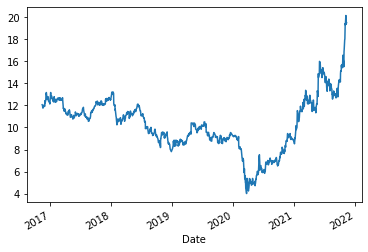

In [ ]:
df.F.plot()

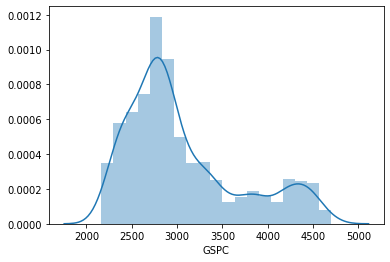

In [ ]:
sns.distplot(df["GSPC"]) # visualizing the data before using it 

In [ ]:
# splitting the dependent and independent variables 
X = df.drop("F", axis = 1)
y = df["F"]
#

from sklearn.model_selection import train_test_split 

# using different sets for training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.linear_model import LinearRegression 

# creating regression object and fitting the model to make predictions 
lr = LinearRegression()
lr.fit(X_train, y_train)
prediction = lr.predict(X_test)

In [ ]:
# checking the prediction (looking at the % error made on any given day)
((prediction - y_test)/y_test)*100
# not to bad considering the simplicity ofthe model 

Date
2020-12-29    15.031920
2018-06-11    -7.473543
2021-08-19     7.135326
2019-10-21    10.015144
2018-03-19   -14.929910
                ...    
2021-03-18    -9.040627
2019-11-26    15.803476
2021-03-04    -0.868471
2017-09-19    -8.376027
2021-03-10   -11.804161
Name: F, Length: 231, dtype: float64

In [ ]:
# quantifying the goodness of the fit 

from sklearn.metrics import mean_squared_error, r2_score

def calculate_fitmetrics(y_test, y_prediction):
    mse = mean_squared_error(y_test, y_prediction) # variance of error residuals 
    rmse = np.sqrt(mse)
    r = r2_score(y_test, y_prediction) 
    
    print(mse)
    print(rmse)
    print(r)
    

    
calculate_fitmetrics(y_test, prediction)



1.2984181151695742
1.1394815115523262
0.7858807300765872


In [ ]:
# relatively high r score therefore good fit 

In [ ]:
# now using Support Vector Regression 
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr = SVR()

param_grid = {'C' : [0.1, 1, 10, 100, 1000], 
              'gamma' : [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel' : ['rbf']}

grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ......... C=0.1, gamma=1, kernel=rbf, score=-0.006, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ......... C=0.1, gamma=1, kernel=rbf, score=-0.023, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ......... C=0.1, gamma=1, kernel=rbf, score=-0.085, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ......... C=0.1, gamma=1, kernel=rbf, score=-0.009, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ......... C=0.1, gamma=1, kernel=rbf, score=-0.038, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ....... C=0.1, gamma=0.1, kernel=rbf, score=-0.006, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ....... C=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ...... C=0.1, gamma=0.01, kernel=rbf, score=-0.023, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ...... C=0.1, gamma=0.01, kernel=rbf, score=-0.085, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ...... C=0.1, gamma=0.01, kernel=rbf, score=-0.009, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ...... C=0.1, gamma=0.01, kernel=rbf, score=-0.038, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ..... C=0.1, gamma=0.001, kernel=rbf, score=-0.005, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ..... C=0.1, gamma=0.001, kernel=rbf, score=-0.023, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ..... C=0.1, gamma=0.001, kernel=rbf, score=-0.084, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] .

[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.087, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.191, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.162, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.184, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] ......... C=100, gamma=1, kernel=rbf, score=-0.003, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] ......... C=100, gamma=1, kernel=rbf, score=-0.039, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] ......... C=100, gamma=1, kernel=rbf, score=-0.028, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    3.0s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [ ]:
# finding the best parameters for the estimation

grid.best_estimator_

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.0001,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
# calling svr with the best params 
svr = SVR(C = 10, gamma = 0.0001, kernel = 'rbf')
svr.fit(X_train, y_train)
svr_prediction = svr.predict(X_test)

In [ ]:
svr_prediction

array([10.13044259, 11.24832467, 10.70624926, 10.08472176, 10.30870215,
       10.25097252, 10.10788458, 11.9122709 , 10.2527985 , 11.23288669,
       11.66189492, 10.34087055, 11.3790799 , 10.24737933, 10.93958395,
       10.04422416, 10.86889783,  9.91842988,  8.8232462 , 11.23517092,
       12.4520929 , 10.3741452 , 10.22489756,  9.63799004, 10.92851731,
       10.25279851, 10.49286321, 11.11323455, 10.1932227 , 10.25279852,
       10.25277375, 10.52663863, 10.26041116, 10.11620605, 10.20005319,
       10.2527984 , 10.25205021, 11.26217182, 10.4107341 , 10.4372675 ,
        9.97119315, 10.11383044,  9.82222807,  9.85046634, 10.52492352,
       10.10527926, 10.25118267, 11.48392304,  9.97192061, 10.28354864,
       10.30259738, 10.24088416,  9.98697153, 10.92357854, 10.25279851,
       10.24062606, 10.23529659, 10.21842839,  8.52099081,  9.94574226,
       10.20839608,  9.69199881, 10.25279851, 10.71948746,  9.95101367,
       10.25279851,  9.68805381, 11.39548423, 10.14985276,  9.92

In [ ]:
((svr_prediction - y_test)/y_test)*100

Date
2020-12-29    14.857630
2018-06-11    -6.497715
2021-08-19   -15.499217
2019-10-21    11.680200
2018-03-19    -6.369646
                ...    
2021-03-18   -17.911940
2019-11-26     4.817441
2021-03-04   -14.058690
2017-09-19    -0.718513
2021-03-10   -20.582505
Name: F, Length: 231, dtype: float64